In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

path = "C:/Users/Admin/Documents/ironhack/streaming_service_recommender/"

## EDA TV Shows Starting Years

#### Goals

- Get descriptive statistics for the starting years of tv shows for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Netflix
#### i. Import data

In [2]:
netflix = pd.read_pickle(path + "Data/netflix_final_clean.pkl")

In [3]:
netflix.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Breaking Bad,2008,18.0,9.5,tt0903747,tvSeries,Breaking Bad,Breaking Bad,2008.0,2008.0,49.0,"Crime,Drama,Thriller"
1,Stranger Things,2016,16.0,8.8,tt4574334,tvSeries,Stranger Things,Stranger Things,2016.0,2016.0,51.0,"Drama,Fantasy,Horror"
2,Sherlock,2010,16.0,9.1,tt1475582,tvSeries,Sherlock,Sherlock,2010.0,2010.0,88.0,"Crime,Drama,Mystery"
3,Better Call Saul,2015,18.0,8.7,tt3032476,tvSeries,Better Call Saul,Better Call Saul,2015.0,2015.0,46.0,"Crime,Drama"
4,The Office,2005,16.0,8.9,tt0386676,tvSeries,The Office,The Office,2005.0,2005.0,22.0,Comedy


In [5]:
netflix["startYear"].isna().sum()

42

In [6]:
1 - ((netflix["startYear"].isna().sum()) / len(netflix))

0.976998904709748

Since the data comes from IMDB's data base, we cannot fill in null values, so we will be working with 97% of the data.

We will create an individual data frame to use for this notebook.

In [12]:
netflix_years = netflix[["show", "startYear"]]

netflix_years = netflix_years[~netflix_years["startYear"].isna()]

In [13]:
netflix_years.head()

,show,startYear
0,Breaking Bad,2008.0
1,Stranger Things,2016.0
2,Sherlock,2010.0
3,Better Call Saul,2015.0
4,The Office,2005.0


#### ii. Descriptive Statistics

In [14]:
netflix_years["startYear"].describe()

count    1784.000000
mean     2014.068386
std         6.808809
min      1959.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: startYear, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by netflix were originally released in average on 2014.
- The tv shows raneg from 1959 to 2020.
- 50% of the tv shows were released on 2016 or later.
- 25% of the tv shows were released on 2013 or earlier.

#### iii. Plotting

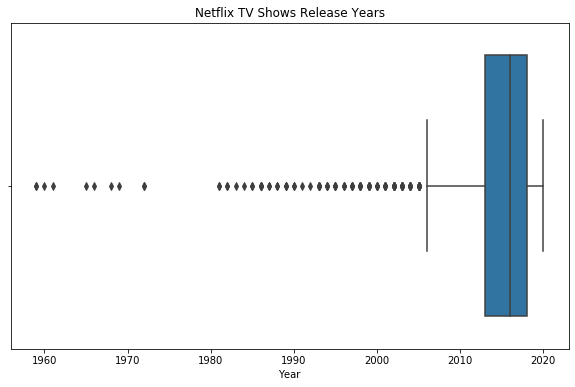

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix_years["startYear"])
ax.set_title("Netflix TV Shows Release Years")
ax.set_xlabel("Year");

We can se from the barplot above that we have some outliers from 2005 and older. We will make a zoom to this box plot and reduce the x axis limit from 2000 to 2022.

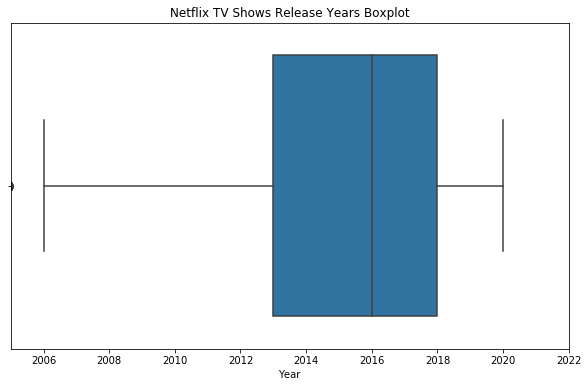

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix_years["startYear"])
ax.set_title("Netflix TV Shows Release Years Boxplot")
ax.set_xlabel("Year")

ax.set_xlim(2005, 2022);

From the zoomed boxplot we can see that most tv shows provided by Netflix had a release date from 2013 to 2018, meaning that most of the tv shows are from 7 to 2 years old.

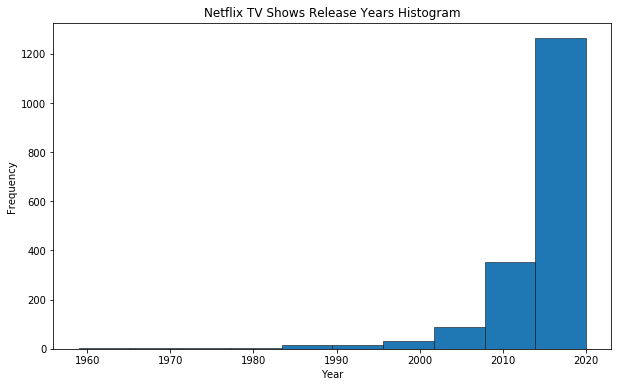

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(netflix_years["startYear"], ec="black", lw=0.5)
ax.set_title("Netflix TV Shows Release Years Histogram")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency");

The histogram above shows that the years disribution is heavily right skewed, having most tv shows with a release date ranging from 2015 to 2020.